# Meudon PDR code emulator predictions

This notebook shows how to use the `MeudonPDR` class, which provides a fast, memory-light and accurate emulator of the Meudon PDR code.

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

sys.path.insert(0, os.path.join(".."))

from infobs.model import MeudonPDR
from infobs.graphics import PDRPlotter

%load_ext autoreload
%autoreload 2

## Predictions from a grid of parameters

In [2]:
lines = ["13c_o_j1__j0", "13c_o_j2__j1", "13c_o_j3__j2"]

### Grid setup

In [3]:
df_params = pd.DataFrame(
    {
        "Av": [1, 5, 10, 15, 20],
        "G0": [1e2, 1e2, 1e2, 1e2, 1e2],
        "Pth": [1e5, 1e5, 1e5, 1e5, 1e5],
        "angle": [0, 0, 0, 0, 0],
    }
)

df_params

,Av,G0,Pth,angle
0,1,100.0,100000.0,0
1,5,100.0,100000.0,0
2,10,100.0,100000.0,0
3,15,100.0,100000.0,0
4,20,100.0,100000.0,0


### Predictions of integrated line intensities

In [4]:
meudonpdr = MeudonPDR()
meudonpdr.predict(df_params, lines)

,Av,G0,Pth,angle,kappa,13c_o_j1__j0,13c_o_j2__j1,13c_o_j3__j2
0,1.0,100.0,100000.0,0.0,1.0,0.000276,0.000318,0.000128
1,5.0,100.0,100000.0,0.0,1.0,10.176692,11.708745,3.919423
2,10.0,100.0,100000.0,0.0,1.0,22.873276,21.915024,8.102161
3,15.0,100.0,100000.0,0.0,1.0,29.498773,25.964494,10.321277
4,20.0,100.0,100000.0,0.0,1.0,34.912525,29.605632,12.635616


### Integrated intensity unit

Set the `kelvin` parameter to False if you want integrated line intensities in erg cm-2 s-1 sr-1

In [5]:
meudonpdr = MeudonPDR(kelvin=False)
meudonpdr.predict(df_params, lines)

,Av,G0,Pth,angle,kappa,13c_o_j1__j0,13c_o_j2__j1,13c_o_j3__j2
0,1.0,100.0,100000.0,0.0,1.0,3.785540e-13,3.483762e-12,4.746177e-12
1,5.0,100.0,100000.0,0.0,1.0,1.395919e-08,1.284490e-07,1.451301e-07
2,10.0,100.0,100000.0,0.0,1.0,3.137487e-08,2.404155e-07,3.000103e-07
3,15.0,100.0,100000.0,0.0,1.0,4.046295e-08,2.848396e-07,3.821807e-07
4,20.0,100.0,100000.0,0.0,1.0,4.788890e-08,3.247841e-07,4.678770e-07


### Adding a scaling parameter to integrate uncertainty on geometry and beam dilution

In this example, we assume the logarithm of the scaling parameter $\kappa$ to be uniformly distributed:

$$\log_{10}\kappa \in \left[-\frac12, \frac12\right]$$

When not specified, the kappa parameter is constant equal to 1 and therefore has no impact.

While the predictions of the PDR code emulator are deterministic, adding this parameter to the model introduces randomness. This parameter is sampled from a `Sampler`, see the `samplers.ipynb` notebook for more details.

In [6]:
from infobs.sampling import LogUniform

kappa = LogUniform(10**-0.5, 10**0.5)

meudonpdr.predict(df_params, lines, kappa=kappa)

,Av,G0,Pth,angle,kappa,13c_o_j1__j0,13c_o_j2__j1,13c_o_j3__j2
0,1.0,100.0,100000.0,0.0,0.362598,1.372631e-13,1.263207e-12,1.720956e-12
1,5.0,100.0,100000.0,0.0,1.245769,1.738993e-08,1.600178e-07,1.807985e-07
2,10.0,100.0,100000.0,0.0,1.030183,3.232187e-08,2.476720e-07,3.090656e-07
3,15.0,100.0,100000.0,0.0,2.247830,9.095385e-08,6.402709e-07,8.590772e-07
4,20.0,100.0,100000.0,0.0,0.408667,1.957059e-08,1.327284e-07,1.912057e-07


## Prediction plots

In [7]:
plotter = PDRPlotter(kelvin=True)
plotter.print_parameters_space()

Parameters space
Av: [1, 40] mag
G0: [0.6393, 63930.0] 
Pth: [100000.0, 1000000000.0] K.cm-3
angle: [0, 60] deg


### Profiles

In [8]:
lines = ["13c_o_j1__j0", "13c_o_j2__j1", "13c_o_j3__j2"]

Av = 6
G0 = 1e2
Pth = 1e5

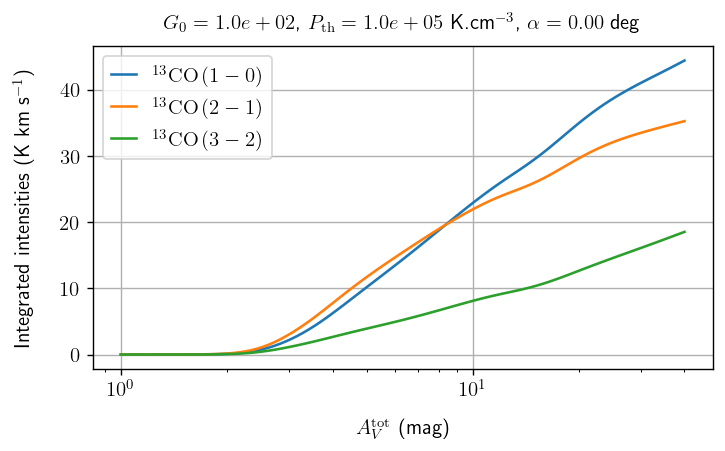

In [9]:
plt.figure(figsize=(6.4, 0.7 * 4.8), dpi=125)

plotter.plot_profile(
    lines,
    Av=None,
    G0=1e2,
    Pth=1e5,
    angle=0,
    logy=False,
)

plt.show()

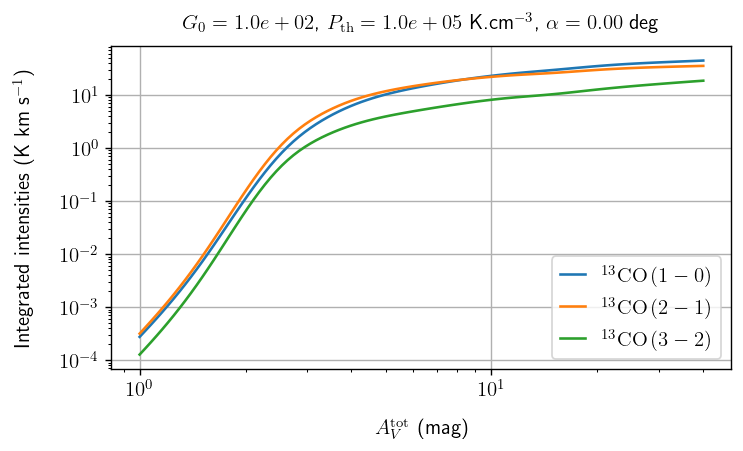

In [10]:
plt.figure(figsize=(6.4, 0.7 * 4.8), dpi=125)

plotter.plot_profile(
    lines,
    Av=None,
    G0=1e2,
    Pth=1e5,
    angle=0,
    logy=True,
)

plt.show()

### Slice (color plot)

In [11]:
line = "13c_o_j1__j0"

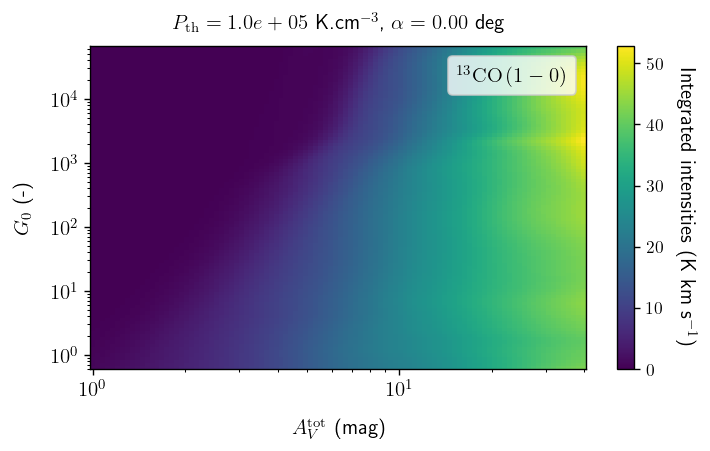

In [12]:
plt.figure(figsize=(6.4, 0.7 * 4.8), dpi=125)

plotter.plot_slice(
    line,
    Av=None,
    G0=None,
    Pth=1e5,
    angle=0,
    logz=False,
)

plt.show()

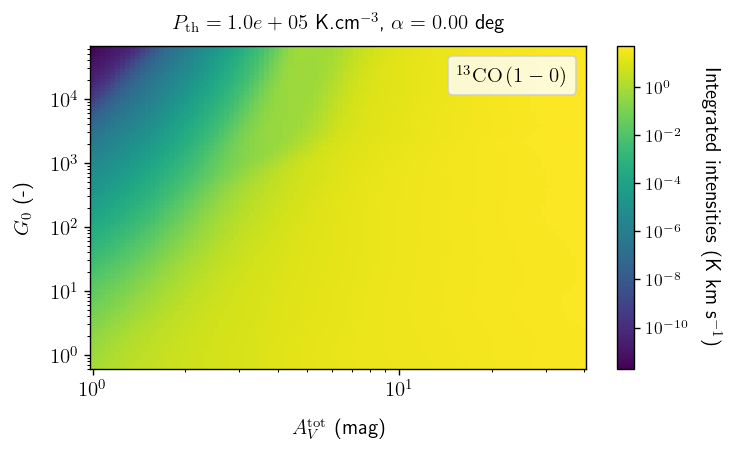

In [13]:
plt.figure(figsize=(6.4, 0.7 * 4.8), dpi=125)

plotter.plot_slice(
    line,
    Av=None,
    G0=None,
    Pth=1e5,
    angle=0,
    logz=True,
)

plt.show()

### Slice (contour plot)

In [14]:
line = "13c_o_j1__j0"

In [15]:
# TODO
# plt.figure(figsize=(6.4, 0.7*4.8), dpi=125)

# plotter.plot_slice(
#     line,
#     Av=None,
#     G0=None,
#     Pth=1e5,
#     angle=0,
#     logz=True,
#     contour=True
# )

# plt.show()

### Plots from CSV

It is also possible to automatically plot and save a series of figures (profiles or slices) based on instructions contained in a `.csv` file.

#### Profiles

In [16]:
csv_file = os.path.join("meudonpdr", "profiles.csv")
path_outputs = os.path.join("meudonpdr", "profiles")
contour = False

plotter.save_profiles_from_csv(csv_file, path_outputs, legend=True, latex=True, dpi=150)

#### Slices

In [17]:
csv_file = os.path.join("meudonpdr", "slices.csv")
path_outputs = os.path.join("meudonpdr", "slices")
contour = False

plotter.save_slices_from_csv(
    csv_file, path_outputs, contour=contour, legend=True, latex=True, dpi=150
)